In [1]:
from osgeo import gdal, ogr
import os
import subprocess as sp
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from pandas.tseries import offsets

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
def listall(RootFolder, varname='',extension='.png'):
    lists = [os.path.join(root, name)
             for root, dirs, files in os.walk(RootFolder)
             for name in files
             if varname in name
             if name.endswith(extension)]
    return lists

In [4]:
# VHI VHI START
# get index from tif files
files = listall(r'J:\VHI_2003_2013', extension='.tif')
index = []
for i in files:
    # get date
    year = int(i[-12:-8])
    doy = int(i[-7:-4])
    date = datetime(year, 1, 1) + timedelta(doy - 1)
    date = np.datetime64(date)
    date = pd.Timestamp(np.datetime_as_string(date))
    index.append(date)
index = np.array(index)

print files[0], index[0]
# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=index, columns=columns)
df_shp = pd.DataFrame(index=index, columns=columns)

J:\VHI_2003_2013\VHI_2003_001.tif 2003-01-01 00:00:00+00:00


In [5]:
siteIDin = '58122'
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:    
    try:
        # get siteID from Field
        siteID = str(int(feat.GetField('Site_ID')))        
        if siteID == siteIDin:
            src_ds = gdal.Open(files[0]) 
            gt = src_ds.GetGeoTransform()            
            # get lon/lat from GeometryRef
            geom = feat.GetGeometryRef()
            mx,my=geom.GetX(), geom.GetY()  #coord in map units            

            # convert from map to pixel coordinates.    
            px = int((mx - gt[0]) / gt[1]) #x pixel
            py = int((my - gt[3]) / gt[5]) #y pixel
            
    except:
        continue

In [6]:
mx, my

(116.98, 33.63)

In [7]:
array = np.zeros((len(files),15,15))
for idx, i in enumerate(files[0:1]):
    # load raster GeoTransform, RasterBand    
    try:
        src_ds = gdal.Open(i) 
        gt = src_ds.GetGeoTransform()
        rb = src_ds.GetRasterBand(1)

        # get date
        year = int(i[-12:-8])
        doy = int(i[-7:-4])
        date = datetime(year, 1, 1) + timedelta(doy - 1)
        date = np.datetime64(date)
        date = pd.Timestamp(np.datetime_as_string(date))
        #print date
    except Exception, e:
        print e, i
        continue
    try:
        # get mean of nine pixels surround station ID
        array_ID_nine = rb.ReadAsArray(px-7,py-7,15,15)
        array_ID_nine = np.ma.masked_equal(array_ID_nine, 0)
        stationID_mean = np.ma.mean(array_ID_nine)
        df.ix[date][siteIDin] = stationID_mean
        array[idx] = array_ID_nine
    except Exception, e:
        print e, i
        continue

In [8]:
df = df['58122']

In [ ]:
s0304 = df.loc['20031009':'20040610']
s0405 = df.loc['20041009':'20050610']
s0506 = df.loc['20051009':'20060610']
s0607 = df.loc['20061009':'20070610']
s0708 = df.loc['20071009':'20080610']
s0809 = df.loc['20081009':'20090610']
s0910 = df.loc['20091009':'20100610']
s1011 = df.loc['20101009':'20110610']
s1112 = df.loc['20111009':'20120610']
s1213 = df.loc['20121009':'20130610']
#u, indices = np.unique(s1011.index.month, return_index=True)
#np.array([1,  24,  54, 85, 116, 144, 175, 205, 236]) - 1

In [ ]:
sos0304 = (pd.Timestamp('2003-10-22') + offsets.DateOffset(84)).dayofyear
eos0304 = (pd.Timestamp('2004-05-26') + offsets.DateOffset(84)).dayofyear

sos0405 = (pd.Timestamp('2004-10-09') + offsets.DateOffset(84)).dayofyear
eos0405 = (pd.Timestamp('2005-05-28') + offsets.DateOffset(84)).dayofyear

sos0506 = (pd.Timestamp('2005-10-18') + offsets.DateOffset(84)).dayofyear
eos0506 = (pd.Timestamp('2006-05-30') + offsets.DateOffset(84)).dayofyear

sos0607 = (pd.Timestamp('2006-10-18') + offsets.DateOffset(84)).dayofyear
eos0607 = (pd.Timestamp('2007-05-30') + offsets.DateOffset(84)).dayofyear

sos0708 = (pd.Timestamp('2007-10-20') + offsets.DateOffset(84)).dayofyear
eos0708 = (pd.Timestamp('2008-06-02') + offsets.DateOffset(84)).dayofyear

sos0809 = (pd.Timestamp('2008-10-21') + offsets.DateOffset(84)).dayofyear
eos0809 = (pd.Timestamp('2009-05-30') + offsets.DateOffset(84)).dayofyear

sos0910 = (pd.Timestamp('2009-10-18') + offsets.DateOffset(84)).dayofyear
eos0910 = (pd.Timestamp('2010-06-10') + offsets.DateOffset(84)).dayofyear

sos1011 = (pd.Timestamp('2010-10-19') + offsets.DateOffset(84)).dayofyear
eos1011 = (pd.Timestamp('2011-05-30') + offsets.DateOffset(84)).dayofyear

sos1112 = (pd.Timestamp('2011-10-16') + offsets.DateOffset(84)).dayofyear
eos1112 = (pd.Timestamp('2012-06-02') + offsets.DateOffset(84)).dayofyear

sos1213 = (pd.Timestamp('2012-10-25') + offsets.DateOffset(84)).dayofyear
eos1213 = (pd.Timestamp('2013-05-30') + offsets.DateOffset(84)).dayofyear

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
ax.axvline(sos0304, color='gray')
ax.axvline(sos0405, color='gray')
ax.axvline(sos0506, color='gray')
ax.axvline(sos0607, color='gray')
ax.axvline(sos0708, color='gray')
ax.axvline(sos0809, color='gray')
ax.axvline(sos0910, color='gray')
ax.axvline(sos1112, color='gray')
ax.axvline(sos1213, color='gray')
ax.axvline(eos0304, color='gray')
ax.axvline(eos0405, color='gray')
ax.axvline(eos0506, color='gray')
ax.axvline(eos0607, color='gray')
ax.axvline(eos0708, color='gray')
ax.axvline(eos0809, color='gray')
ax.axvline(eos0910, color='gray')
ax.axvline(eos1112, color='gray')
ax.axvline(eos1213, color='gray')

ax.plot((s0304.index + offsets.DateOffset(84)).dayofyear, s0304.values/1000., 
         color='lightblue', label='03-04')
ax.plot((s0405.index + offsets.DateOffset(84)).dayofyear, s0405.values/1000., 
         color='lightblue', label='04-05')
ax.plot((s0506.index + offsets.DateOffset(84)).dayofyear, s0506.values/1000., 
         color='lightblue', label='05-06')
ax.plot((s0607.index + offsets.DateOffset(84)).dayofyear, s0607.values/1000., 
         color='lightblue', label='06-07')
ax.plot((s0708.index + offsets.DateOffset(84)).dayofyear, s0708.values/1000., 
         color='lightblue', label='07-08')
ax.plot((s0809.index + offsets.DateOffset(84)).dayofyear, s0809.values/1000., 
         color='lightblue', label='08-09')
ax.plot((s0910.index + offsets.DateOffset(84)).dayofyear, s0910.values/1000., 
         color='lightblue', label='09-10')
plot1011, = ax.plot((s1011.index + offsets.DateOffset(84)).dayofyear, s1011.values/1000., 
                   color='darkblue', label='10-11', lw=2, zorder=40)
ax.plot((s1112.index + offsets.DateOffset(84)).dayofyear, s1112.values/1000., 
         color='lightblue', label='11-12')
ax.plot((s1213.index + offsets.DateOffset(84)).dayofyear, s1213.values/1000., 
         color='lightblue', label='12-13')
#plt.legend()

ax.set_xticks([  0,  23,  53,  84, 115, 143, 174, 204, 235])
ax.set_xticklabels(['Oct','Nov','Dec','Jan','Feb','Mar','Apr','Jun','Jul'])
ax.set_ylabel('NDVI')


plt_sos1011 = ax.axvline(sos1011, color='k',lw=2)
plt_eos1011 = ax.axvline(eos1011, color='k',lw=2)
plt.grid()
plt.tight_layout()
leg = plt.legend([plot1011,plt_sos1011],['season 2010-2011',
                                                    'sewing / harvesting'], loc=9)
leg.get_frame().set_linewidth(0.0)
plt.savefig(r'D:\Data\NDAI_VHI_GROUNDTRUTH\png//all_seasons_58122.png',dpi=600)
plt.show()

In [9]:
def scale_bar(ax, length, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    """
    #Projection in metres, need to change this to suit your own figure
    utm = img_tiles.GoogleTiles().crs#ccrs.UTM(36)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    #Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * 500, sbcx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbcx, sbcy, str(length) + ' km', transform=utm,
            horizontalalignment='center', verticalalignment='bottom', size=16)

In [10]:
import matplotlib.colors as mcolors
import matplotlib

def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)
c = mcolors.ColorConverter().to_rgb

def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    
    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in xrange(N+1) ]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)


In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import img_tiles
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import subprocess as sp
from matplotlib.transforms import offset_copy

D:\Python27x64\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


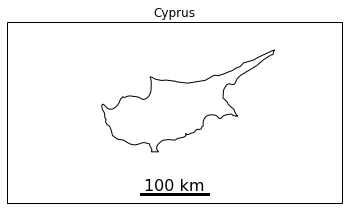

In [13]:
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Mercator())
plt.title('Cyprus')
ax.set_extent([31, 35.5, 34, 36], ccrs.Geodetic())
ax.coastlines(resolution='10m')

scale_bar(ax, 100)

plt.show()

In [14]:
cb_NDVI = make_colormap([c('#6E423C'), c('#87523B'),0.125, c('#87523B'), c('#A36C34'),0.25, 
                         c('#A36C34'), c('#BF9123'),0.375, c('#BF9123'), c('#DBC712'),0.5, 
                         c('#DBC712'), c('#B3D604'),0.625, c('#B3D604'), c('#51B004'),0.75,
                         c('#51B004'), c('#0A8701'),0.875, c('#0A8701'), c('#01611F'),1,
                         c('#01611F')])
bounds = [-.1,0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
cmap = cmap_discretize(cb_NDVI,9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

"C:\Program Files\GDAL//ogr2ogr.exe" -f "ESRI Shapefile" county.shp D:\Data\ChinaShapefile\CHN_adm//CHN_adm3.shp -clipsrc 116.84693268 34.10324112 117.42693268 33.27324112 -overwrite


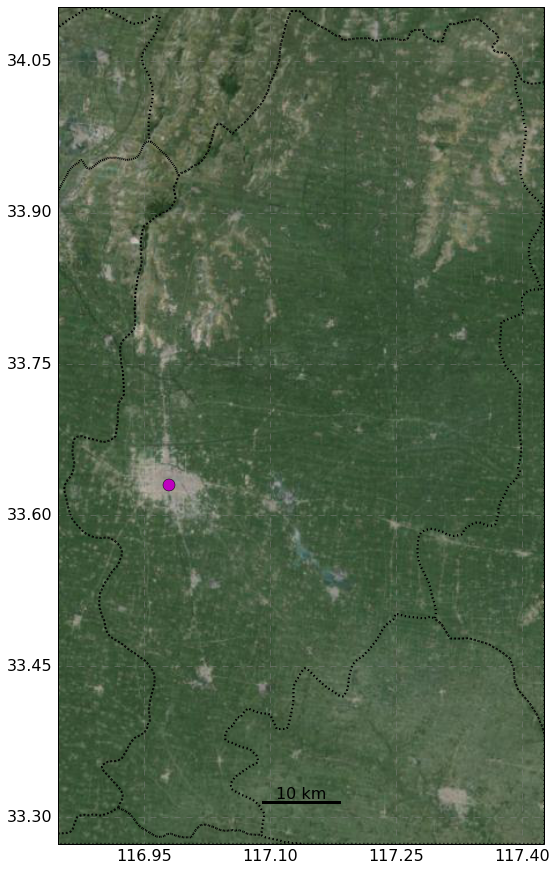

In [20]:


tiles_sat = img_tiles.GoogleTiles(style='satellite')
tiles_str = img_tiles.GoogleTiles(desired_tile_form='RGBA',style='only_streets')
web_merc = img_tiles.GoogleTiles().crs
img_extent = (116.9094,117.0444,33.56574,33.70074)
extent = [116.84693268,117.42693268,33.27324112,34.10324112]
#extent = [116.9019,117.0519,33.55824,33.70824]

for idx in range(0,1):
    val = df.index[idx]    
    try:
        date = str(val.year) +'-'+ str(val.month).zfill(2) +'-'+ str(val.day).zfill(2)

        fig = plt.figure(figsize=(15,15))
        ax = plt.subplot(111, projection=web_merc)
        ax.set_extent(extent)#[-4.2, -3, 50.3, 50.7])
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, 
                          color='gray', alpha=0.5, linestyle='--')#, zorder=6)
        gl.ylabels_right = False
        gl.xlabels_top = False
        gl.xlabel_style = {'size': 16}
        gl.ylabel_style = {'size': 16}

        # prulletaria
        ogr2ogr = r'C:\Program Files\GDAL//ogr2ogr.exe'
        base_geom = r'D:\Data\ChinaShapefile\CHN_adm'
        # county
        in_file_county = base_geom + '//CHN_adm3.shp'    
        outfile_county = 'county.shp'

        command = [ogr2ogr, '-f', "ESRI Shapefile", outfile_county, in_file_county,'-clipsrc',
                   str(extent[0]),str(extent[3]),str(extent[1]),str(extent[2]), '-overwrite']
        print (sp.list2cmdline(command))
        norm = sp.Popen(sp.list2cmdline(command),stdout=sp.PIPE, shell=True)
        norm.communicate()
        ax.add_geometries(Reader(outfile_county).geometries(), ccrs.PlateCarree(), 
                          facecolor='',linestyle=':', linewidth=2)#, zorder = 5)

#         # ADD ARRAY AS IMSHOW
#         array_im = np.flipud(array[idx])
#         im = ax.imshow(array_im/1000., origin='upper', extent=img_extent,
#                   transform=ccrs.PlateCarree(), cmap=cmap, vmin=-0.1, vmax=0.8)#zorder=4,)
#         cb = plt.colorbar(im, fraction=0.0476, pad=0.04, ticks=bounds, norm=norm, 
#                           orientation='horizontal')
#         cb.set_label('NDVI', size=16)
#         #cb.set_ticklabels(ticks)
#         cb.ax.tick_params(labelsize=16) 

        # ADD GOOGLE DATA
        ax.add_image(tiles_sat, 10)
        #ax.add_image(tiles_str, 13)
        plt.plot(116.98, 33.63, marker='o', color='m', markersize=12,
                 transform=ccrs.PlateCarree())
        #plt.text(0.9, 0.96,date, ha='center', va='center', 
        #         transform=ax.transAxes, size=20)
        # LABEL POINT
        #geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
        #text_transform = offset_copy(geodetic_transform, units='dots', x=-60)
        #plt.text(116.98, 33.63, u'Ground Station ID 58122', size=16,
        #         verticalalignment='center', horizontalalignment='right',
        #         transform=text_transform,
        #         bbox=dict(facecolor='wheat', boxstyle='round'))

        scale_bar(ax, 10)
#         plt.savefig(r'D:\Data\NDAI_VHI_GROUNDTRUTH\png//Yongqiao_'+date+'.png', dpi=400, 
#                     bbox_inches='tight')

        plt.show()
        #plt.close(fig)
        #fig.clf()    
    except Exception, e:
        print e, idx
        continue        

In [102]:
#for idx, val in enumerate(df.index[2846:3070]):
#    print idx
for idx in range(2846,3070):
    val = df.index[idx]
    print idx

2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045


In [103]:
val

Timestamp('2011-05-30 00:00:00+0000', tz='UTC')

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import img_tiles

tiles = img_tiles.OSM()
fig = plt.figure(figsize=(15,14))
ax = plt.subplot(211, projection=ccrs.Mercator())
ax.set_extent([-4.2, -3, 50.3, 50.7])
ax.add_image(tiles, 9)
ax.coastlines("10m")

ax = plt.subplot(212, projection=ccrs.Mercator())
ax.set_extent([-4.2, -3, 50.3, 50.7])
ax.add_image(tiles, 10)
ax.coastlines("10m")

plt.show()

In [ ]:
im = plt.imshow(array_ID_nine, interpolation='nearest')
plt.colorbar()

In [ ]:
# NVAI NVAI START
# get index from tif files
files = listall(r'D:\Data\NVAI_2003_2013', extension='.tif')
index = []
for i in files:
    # get date
    year = int(i[-12:-8])
    doy = int(i[-7:-4])
    date = datetime(year, 1, 1) + timedelta(doy - 1)
    date = np.datetime64(date)
    date = pd.Timestamp(np.datetime_as_string(date))
    index.append(date)
index = np.array(index)

print files[0], index[0]
# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=index, columns=columns)
df_shp = pd.DataFrame(index=index, columns=columns)

for i in files:
    # load raster GeoTransform, RasterBand    
    try:
        src_ds = gdal.Open(i) 
        gt = src_ds.GetGeoTransform()
        rb = src_ds.GetRasterBand(1)

        # get date
        year = int(i[-12:-8])
        doy = int(i[-7:-4])
        date = datetime(year, 1, 1) + timedelta(doy - 1)
        date = np.datetime64(date)
        date = pd.Timestamp(np.datetime_as_string(date))
        print date
    except Exception, e:
        print e, i
        continue
        
    ds = ogr.Open(shp_filename)
    lyr = ds.GetLayer()
    for feat in lyr:
        try:
            # get siteID from Field

            siteID = str(int(feat.GetField('Site_ID')))
            #if siteID == '50353':

            # get lon/lat from GeometryRef
            geom = feat.GetGeometryRef()
            mx,my=geom.GetX(), geom.GetY()  #coord in map units

            # convert from map to pixel coordinates.    
            px = int((mx - gt[0]) / gt[1]) #x pixel
            py = int((my - gt[3]) / gt[5]) #y pixel

            # get mean of nine pixels surround station ID
            array_ID_nine = rb.ReadAsArray(px-1,py-1,3,3)
            array_ID_nine = np.ma.masked_equal(array_ID_nine, 0)
            stationID_mean = np.ma.mean(array_ID_nine)
            # stationID_mean = np.nanmean(array_ID_nine)            
            # set pandas dataframe value
            df.ix[date][siteID] = stationID_mean
            #print siteID#, px, py, stationID_mean, df.ix[date][siteID]
        except Exception, e:
            print e, i, feat.GetFID()
            continue            
            
# save dataframe to pick so it can be loaded if necessary
df.to_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_NVAI_2003_2013.pkl')
#df = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//remote_sensing_2003_2013.pkl')             

In [ ]:
# NTAI NTAI START
# get index from tif files
files = listall(r'D:\Data\NTAI_2003_2013', extension='.tif')
index = []
for i in files:
    # get date
    year = int(i[-12:-8])
    doy = int(i[-7:-4])
    date = datetime(year, 1, 1) + timedelta(doy - 1)
    date = np.datetime64(date)
    date = pd.Timestamp(np.datetime_as_string(date))
    index.append(date)
index = np.array(index)

print files[0], index[0]
# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=index, columns=columns)
df_shp = pd.DataFrame(index=index, columns=columns)

for i in files:
    # load raster GeoTransform, RasterBand    
    try:
        src_ds = gdal.Open(i) 
        gt = src_ds.GetGeoTransform()
        rb = src_ds.GetRasterBand(1)

        # get date
        year = int(i[-12:-8])
        doy = int(i[-7:-4])
        date = datetime(year, 1, 1) + timedelta(doy - 1)
        date = np.datetime64(date)
        date = pd.Timestamp(np.datetime_as_string(date))
        print date
    except Exception, e:
        print e, i
        continue
        
    ds = ogr.Open(shp_filename)
    lyr = ds.GetLayer()
    for feat in lyr:
        try:
            # get siteID from Field

            siteID = str(int(feat.GetField('Site_ID')))
            #if siteID == '50353':

            # get lon/lat from GeometryRef
            geom = feat.GetGeometryRef()
            mx,my=geom.GetX(), geom.GetY()  #coord in map units

            # convert from map to pixel coordinates.    
            px = int((mx - gt[0]) / gt[1]) #x pixel
            py = int((my - gt[3]) / gt[5]) #y pixel

            # get mean of nine pixels surround station ID
            array_ID_nine = rb.ReadAsArray(px-1,py-1,3,3)
            array_ID_nine = np.ma.masked_equal(array_ID_nine, 0)
            stationID_mean = np.ma.mean(array_ID_nine)
            # stationID_mean = np.nanmean(array_ID_nine)            
            # set pandas dataframe value
            df.ix[date][siteID] = stationID_mean
            #print siteID#, px, py, stationID_mean, df.ix[date][siteID]
        except Exception, e:
            print e, i, feat.GetFID()
            continue            
            
# save dataframe to pick so it can be loaded if necessary
df.to_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_NTAI_2003_2013.pkl')
#df = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//remote_sensing_2003_2013.pkl')             

In [ ]:
# VCI VCI START
# get index from tif files
files = listall(r'D:\Data\VCI_2003_2013', extension='.tif')
index = []
for i in files:
    # get date
    year = int(i[-12:-8])
    doy = int(i[-7:-4])
    date = datetime(year, 1, 1) + timedelta(doy - 1)
    date = np.datetime64(date)
    date = pd.Timestamp(np.datetime_as_string(date))
    index.append(date)
index = np.array(index)

print files[0], index[0]
# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=index, columns=columns)
df_shp = pd.DataFrame(index=index, columns=columns)

for i in files:
    # load raster GeoTransform, RasterBand    
    try:
        src_ds = gdal.Open(i) 
        gt = src_ds.GetGeoTransform()
        rb = src_ds.GetRasterBand(1)

        # get date
        year = int(i[-12:-8])
        doy = int(i[-7:-4])
        date = datetime(year, 1, 1) + timedelta(doy - 1)
        date = np.datetime64(date)
        date = pd.Timestamp(np.datetime_as_string(date))
        print date
    except Exception, e:
        print e, i
        continue
        
    ds = ogr.Open(shp_filename)
    lyr = ds.GetLayer()
    for feat in lyr:
        try:
            # get siteID from Field

            siteID = str(int(feat.GetField('Site_ID')))
            #if siteID == '50353':

            # get lon/lat from GeometryRef
            geom = feat.GetGeometryRef()
            mx,my=geom.GetX(), geom.GetY()  #coord in map units

            # convert from map to pixel coordinates.    
            px = int((mx - gt[0]) / gt[1]) #x pixel
            py = int((my - gt[3]) / gt[5]) #y pixel

            # get mean of nine pixels surround station ID
            array_ID_nine = rb.ReadAsArray(px-1,py-1,3,3)
            array_ID_nine = np.ma.masked_equal(array_ID_nine, 0)
            stationID_mean = np.ma.mean(array_ID_nine)
            # stationID_mean = np.nanmean(array_ID_nine)            
            # set pandas dataframe value
            df.ix[date][siteID] = stationID_mean
            #print siteID#, px, py, stationID_mean, df.ix[date][siteID]
        except Exception, e:
            #print e, i, feat.GetFID()
            continue            
            
# save dataframe to pick so it can be loaded if necessary
df.to_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_VCI_2003_2013.pkl')
#df = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//remote_sensing_2003_2013.pkl')             

In [ ]:
# TCI TCI START
# get index from tif files
files = listall(r'D:\Data\TCI_2003_2013', extension='.tif')
index = []
for i in files:
    # get date
    year = int(i[-12:-8])
    doy = int(i[-7:-4])
    date = datetime(year, 1, 1) + timedelta(doy - 1)
    date = np.datetime64(date)
    date = pd.Timestamp(np.datetime_as_string(date))
    index.append(date)
index = np.array(index)

print files[0], index[0]
# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=index, columns=columns)
df_shp = pd.DataFrame(index=index, columns=columns)

for i in files:
    # load raster GeoTransform, RasterBand    
    try:
        src_ds = gdal.Open(i) 
        gt = src_ds.GetGeoTransform()
        rb = src_ds.GetRasterBand(1)

        # get date
        year = int(i[-12:-8])
        doy = int(i[-7:-4])
        date = datetime(year, 1, 1) + timedelta(doy - 1)
        date = np.datetime64(date)
        date = pd.Timestamp(np.datetime_as_string(date))
        print date
    except Exception, e:
        print e, i
        continue
        
    ds = ogr.Open(shp_filename)
    lyr = ds.GetLayer()
    for feat in lyr:
        try:
            # get siteID from Field

            siteID = str(int(feat.GetField('Site_ID')))
            #if siteID == '50353':

            # get lon/lat from GeometryRef
            geom = feat.GetGeometryRef()
            mx,my=geom.GetX(), geom.GetY()  #coord in map units

            # convert from map to pixel coordinates.    
            px = int((mx - gt[0]) / gt[1]) #x pixel
            py = int((my - gt[3]) / gt[5]) #y pixel

            # get mean of nine pixels surround station ID
            array_ID_nine = rb.ReadAsArray(px-1,py-1,3,3)
            array_ID_nine = np.ma.masked_equal(array_ID_nine, 0)
            stationID_mean = np.ma.mean(array_ID_nine)
            # stationID_mean = np.nanmean(array_ID_nine)            
            # set pandas dataframe value
            df.ix[date][siteID] = stationID_mean
            #print siteID#, px, py, stationID_mean, df.ix[date][siteID]
        except Exception, e:
            #print e, i, feat.GetFID()
            continue            
            
# save dataframe to pick so it can be loaded if necessary
df.to_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_TCI_2003_2013.pkl')
#df = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//remote_sensing_2003_2013.pkl')             

In [ ]:
# TCI TCI START
# get index from tif files
files = listall(r'D:\Data\TCI_2003_2013', extension='.tif')
index = []
for i in files:
    # get date
    year = int(i[-12:-8])
    doy = int(i[-7:-4])
    date = datetime(year, 1, 1) + timedelta(doy - 1)
    date = np.datetime64(date)
    date = pd.Timestamp(np.datetime_as_string(date))
    index.append(date)
index = np.array(index)

print files[0], index[0]
# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=index, columns=columns)
df_shp = pd.DataFrame(index=index, columns=columns)

In [ ]:
df['50353'].plot()

In [ ]:
# Following bit is to convert CMA database into similar pandas dataframe scheme as RS data

In [ ]:
import calendar

def get_month_day_range(date):
    """
    For a date 'date' returns the start and end date for the month of 'date'.

    Month with 31 days:
    >>> date = datetime.date(2011, 7, 27)
    >>> get_month_day_range(date)
    (datetime.date(2011, 7, 1), datetime.date(2011, 7, 31))

    Month with 28 days:
    >>> date = datetime.date(2011, 2, 15)
    >>> get_month_day_range(date)
    (datetime.date(2011, 2, 1), datetime.date(2011, 2, 28))
    """
    first_day = date.replace(day = 1)
    last_day = date.replace(day = calendar.monthrange(date.year, date.month)[1])
    return first_day, last_day

In [ ]:
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    try:
        # get siteID from Field
        siteID = str(int(feat.GetField('Site_ID')))
        
        # get decad
        Year = str(int(feat.GetField('Year')))
        Month = str(int(feat.GetField('Month')))
        Decad = str(int(feat.GetField('Decad')))
        Severity = feat.GetField('Severity')
        if Severity == 'Light':
            severity = 1
        elif Severity == 'Medium':
            severity = 2
        elif Severity == 'Heavy':
            severity = 3     
        
        # print siteID, Year, Month, Decad, Severity
        # get first & last day of month
        first, last = get_month_day_range(pd.Timestamp(Year+'-'+Month+'-'+Decad))
        if Decad == str(1):
            # decad 1
            for i in xrange(first.day, first.day + 10):
                date = pd.Timestamp(Year+'-'+Month+'-'+str(i).zfill(2))#.tz_localize('UTC')
                df_shp.ix[date][siteID] = severity
        elif Decad == str(2):
            # decad 2    
            for i in xrange(first.day + 10, first.day + 20):
                date = pd.Timestamp(Year+'-'+Month+'-'+str(i).zfill(2))#.tz_localize('UTC')
                df_shp.ix[date][siteID] = severity

        elif Decad == str(3):
            # decad 3    
            for i in xrange(first.day + 20, last.day + 1):
                date = pd.Timestamp(Year+'-'+Month+'-'+str(i).zfill(2))#.tz_localize('UTC')
                df_shp.ix[date][siteID] = severity

    except Exception, e:
        print e, feat.GetFID()
        continue

In [ ]:
# save dataframe to pick so it can be loaded if necessary
df_shp.to_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//groundtruth2_2003_2013.pkl')
#df_shp = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//groundtruth_2003_2013.pkl') 
df_shp.head()

In [ ]:
df_shp['53723'].plot()

In [ ]:
# Get landuse classes 9 by 9 pixel surround each station
# read globcover map
glb = r'D:\Data\ChinaWorld_GlobCover\Globcover2009_V2.3_Global_//test2.tif'
src_ds = gdal.Open(glb) 
gt = src_ds.GetGeoTransform()
rb = src_ds.GetRasterBand(1)

# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=[0], columns=columns)
#df_shp = pd.DataFrame(index=index, columns=columns)

ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    try:
        # get siteID from Field

        siteID = str(int(feat.GetField('Site_ID')))
        #if siteID == '50353':

        # get lon/lat from GeometryRef
        geom = feat.GetGeometryRef()
        mx,my=geom.GetX(), geom.GetY()  #coord in map units

        # convert from map to pixel coordinates.    
        px = int((mx - gt[0]) / gt[1]) #x pixel
        py = int((my - gt[3]) / gt[5]) #y pixel

        # get mean of nine pixels surround station ID
        array_ID_nine = rb.ReadAsArray(px-4,py-4,9,9)
        #array_ID_nine = np.ma.masked_equal(array_ID_nine, 0)
        #stationID_mean = np.ma.mean(array_ID_nine)
        stationID_mode = np.bincount(array_ID_nine.flatten()).argmax()
        # stationID_mean = np.nanmean(array_ID_nine)            
        # set pandas dataframe value
        df.ix[0][siteID] = stationID_mode
        #print siteID#, px, py, stationID_mean, df.ix[date][siteID]
    except Exception, e:
        #print e, i, feat.GetFID()
        continue            

# save dataframe to pick so it can be loaded if necessary
df.to_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//RS_LANDUSE.pkl')
#df = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//remote_sensing_2003_2013.pkl')   

In [ ]:
# get columns from shp file
shp_filename = r'D:\Data\NDAI_VHI_GROUNDTRUTH\groundtruth2_2003_2013.shp'
siteID_list = []
ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    # get siteID from Field
    siteID = int(feat.GetField('Site_ID'))
    siteID_list.append(siteID)
siteID_array = np.array(siteID_list)
columns = np.unique(siteID_array).astype(str)   

# create empty DataFrame
df = pd.DataFrame(index=['stationID'], columns=columns)
#df_shp = pd.DataFrame(index=index, columns=columns)

ds = ogr.Open(shp_filename)
lyr = ds.GetLayer()
for feat in lyr:
    try:
        # get siteID from Field

        siteID = str(int(feat.GetField('Site_ID')))

        # set pandas dataframe value
        df.ix['stationID'][siteID] = siteID
        #print siteID#, px, py, stationID_mean, df.ix[date][siteID]
    except Exception, e:
        #print e, i, feat.GetFID()
        continue            

# save dataframe to pick so it can be loaded if necessary
df.to_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//GT_StationID.pkl')
#df = pd.read_pickle(r'D:\Data\NDAI_VHI_GROUNDTRUTH//remote_sensing_2003_2013.pkl')   

In [ ]:
province.replace('\t','')

In [ ]:
province

In [ ]:
gt_list = []
rs_list = []
for i in df.columns:
    #print i
    ID = i
    df_concat = pd.concat([df[ID], df_shp[ID]], axis=1)
    df_concat.dropna(inplace = True)
    gt_list = gt_list + df_concat.ix[:,1].tolist()
    rs_list = rs_list + df_concat.ix[:,0].tolist()
    #plt.scatter(df_concat.ix[:,1],df_concat.ix[:,0])
    #plt.xlim(0,4)
    #plt.xticks([1,2,3],['Light','Medium','Heavy'])
#plt.show()
gt_array = np.array(gt_list)
rs_array = np.array(rs_list)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
gt_Series = pd.Series(gt_array)
rs_Series = pd.Series(rs_array)

In [ ]:
df_new = pd.concat([gt_Series, rs_Series], axis=1)
df_new.columns = ['ground-truth','remote-sensing']
df_new.sort('ground-truth', inplace = True)

In [ ]:
ax = sns.violinplot(df_new['remote-sensing'], groupby=df_new['ground-truth'])
ax.set_xticklabels(['light', 'medium','heavy'])
ax.set_title('NDAI vs CMA')

In [ ]:
df_new.shape[0]/3

In [ ]:
df_new['remote-sensing'].describe()

In [ ]:
from osgeo import gdal

driver = gdal.GetDriverByName('GTiff')
file = gdal.Open(r'J:\NDVI_recon\2006//CN_2006_NDVI_recon.001.tif')
band = file.GetRasterBand(1)
lista = band.ReadAsArray()

In [ ]:
lista = np.ma.masked_equal(lista, -3000)

In [ ]:
lista /= 10.

In [ ]:
%%time
list_zeros = np.zeros_like(lista)
list_zeros[np.where( lista < 200 )] = 1
list_zeros[np.where((200 < lista) & (lista < 400)) ] = 2
list_zeros[np.where((400 < lista) & (lista < 600)) ] = 3
list_zeros[np.where((600 < lista) & (lista < 800)) ] = 4
list_zeros[np.where( lista > 800 )] = 5

In [ ]:
%%time
# reclassification
list_zeros = np.zeros_like(lista)
for j in  range(file.RasterXSize):
    for i in  range(file.RasterYSize):
        if lista[i,j] < 200:
            list_zeros[i,j] = 1
        elif 200 < lista[i,j] < 400:
            list_zeros[i,j] = 2
        elif 400 < lista[i,j] < 600:
            list_zeros[i,j] = 3
        elif 600 < lista[i,j] < 800:
            list_zeros[i,j] = 4
        else:
            list_zeros[i,j] = 5

In [ ]:
im = plt.imshow(lista)
plt.colorbar(im)

In [ ]:
x[np.where( x > 3.0 )]

In [ ]:
np.where((200 < lista) & (lista < 400)) 

In [ ]:
# reclassification
lista
for j in  range(file.RasterXSize):
    for i in  range(file.RasterYSize):
        if lista[i,j] < 200:
            lista[i,j] = 1
        elif 200 < lista[i,j] < 400:
            lista[i,j] = 2
        elif 400 < lista[i,j] < 600:
            lista[i,j] = 3
        elif 600 < lista[i,j] < 800:
            lista[i,j] = 4
        else:
            lista[i,j] = 5

